<a href="https://colab.research.google.com/github/JKerms89/Datacamp/blob/main/Datacamp_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [243]:
pwd

'/content'

In [244]:
# Load data from local drive
from google.colab import files

uploaded = files.upload()

Saving boat_data.csv to boat_data (2).csv


In [245]:
# import as pandas df
import pandas as pd
import io 

df = pd.read_csv(io.BytesIO(uploaded['boat_data.csv']))

In [246]:
print(df)

          Price            Boat Type           Manufacturer  \
0      CHF 3337          Motor Yacht   Rigiflex power boats   
1      EUR 3490  Center console boat      Terhi power boats   
2      CHF 3770           Sport Boat     Marine power boats   
3     DKK 25900           Sport Boat     Pioner power boats   
4      EUR 3399         Fishing Boat     Linder power boats   
...         ...                  ...                    ...   
9883   CHF 4900           Sport Boat    Sea Ray power boats   
9884   EUR 4516           Sport Boat                    NaN   
9885   EUR 4499           Sport Boat  BlueCraft power boats   
9886   EUR 4300         Pontoon Boat      Whaly power boats   
9887   CHF 3780         Fishing Boat    DarekCo power boats   

                              Type  Year Built  Length  Width       Material  \
0              new boat from stock        2017    4.00   1.90            NaN   
1              new boat from stock        2020    4.00   1.50  Thermoplastic   
2  

In [247]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


In [248]:
df.corr()

,Year Built,Length,Width,Number of views last 7 days
Year Built,1.000000,0.117290,0.127150,0.024808
Length,0.117290,1.000000,0.873093,-0.135011
Width,0.127150,0.873093,1.000000,-0.157547
Number of views last 7 days,0.024808,-0.135011,-0.157547,1.000000


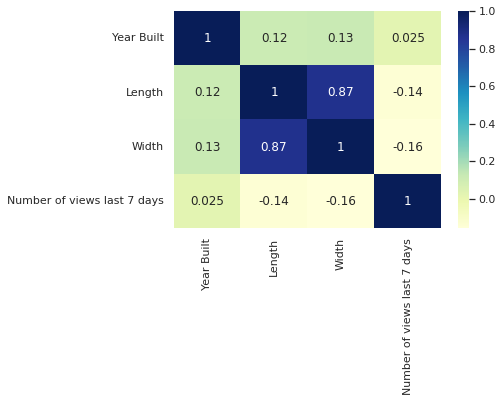

In [249]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [250]:
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

In [251]:
df.shape

(9888, 10)

In [252]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [253]:
df[['Currency', 'Price']] = df['Price'].str.split(' ', expand=True)

In [254]:
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
dtype: object

In [255]:
convert_dict = {'Price': int,
                'Boat Type': object,
                'Manufacturer': object,
                'Type': object,
                'Year Built': int,
                'Length': float,
                'Width': float,
                'Material': object,
                'Location': object,
                'Number of views last 7 days': int,
                'Currency': object,
                'USD': int}

In [256]:
df['Currency'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [257]:
rates = {'CHF': 1.09, 'EUR': 1.13, 'DKK': 0.15, 'Â£': 1.35}

In [258]:
df['USD'] = df['Currency'].map(rates) * df['Price'].astype(int)


In [259]:
df = df.astype(convert_dict)
print(df.dtypes)

Price                            int64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
USD                              int64
dtype: object


In [260]:
df['Year Built'].unique()

array([2017, 2020,    0, 2019, 1999, 2018, 1987, 2004, 1997, 1985, 1981,
       2011, 1979, 1998, 1994, 1996, 1972, 1980, 1974, 1983, 1991, 1992,
       1961, 2015, 2000, 1993, 1968, 2007, 1990, 2010, 1975, 1986, 1941,
       1971, 2005, 1995, 1976, 2001, 2006, 2016, 1984, 1964, 1978, 1940,
       1988, 2003, 1977, 1973, 1970, 1913, 1965, 1950, 2014, 2002, 1963,
       2008, 1948, 1960, 1930, 2009, 1989, 1969, 1982, 1937, 2013, 2012,
       1954, 1959, 1909, 1926, 1910, 1962, 1938, 1936, 1967, 1903, 1933,
       1906, 1908, 2021, 1927, 1929, 1956, 1958, 1922, 1952, 1957, 1928,
       1905, 1951, 1911, 1966, 1915, 1934, 1939, 1953, 1924, 1931, 1920,
       1898, 1955, 1907, 1885, 1895, 1914, 1901, 1942, 1919, 1925, 1889,
       1946, 1904, 1923, 1917, 1935, 1949, 1947, 1912, 1945, 1897, 1902,
       1900])

In [261]:
df.USD.mean()

342672.0232605178

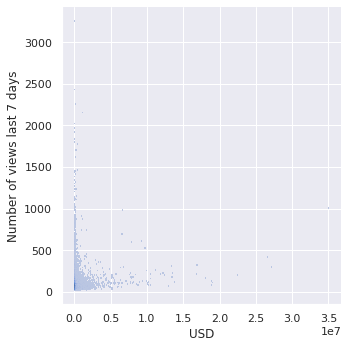

In [262]:
sns.displot(df, x="USD", y="Number of views last 7 days")

In [263]:
df.USD.max()

35030000

In [264]:
df.corr().style.background_gradient(cmap="Blues")

,Price,Year Built,Length,Width,Number of views last 7 days,USD
Price,1.000000,0.012162,0.544831,0.505382,-0.013856,0.956895
Year Built,0.012162,1.000000,0.117290,0.127150,0.024808,0.009930
Length,0.544831,0.117290,1.000000,0.873093,-0.135011,0.562920
Width,0.505382,0.127150,0.873093,1.000000,-0.157547,0.518939
Number of views last 7 days,-0.013856,0.024808,-0.135011,-0.157547,1.000000,-0.008911
USD,0.956895,0.009930,0.562920,0.518939,-0.008911,1.000000


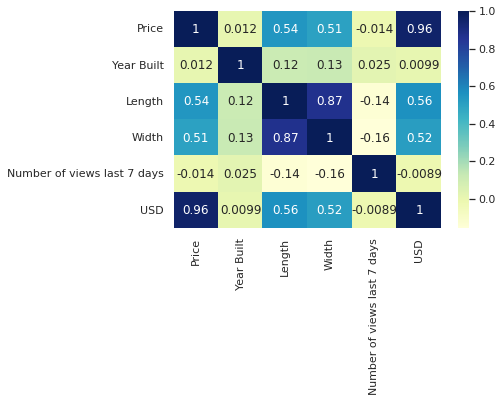

In [265]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(font_scale=1)

In [266]:
#Above shows that there appears to be no correlation between price and no. of views.


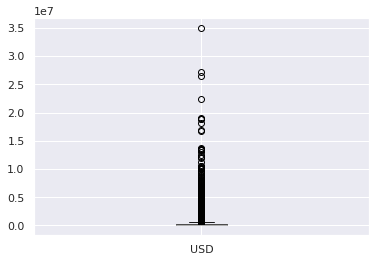

In [267]:
df.boxplot(column = 'USD')
plt.show()

In [268]:
df.describe()

,Price,Year Built,Length,Width,Number of views last 7 days,USD
count,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000,9.888000e+03
mean,3.201373e+05,1893.192860,11.570017,3.520124,149.160801,3.426720e+05
std,1.007482e+06,460.201582,6.002820,1.220534,151.819752,1.099902e+06
min,3.300000e+03,0.000000,1.040000,0.010000,13.000000,3.637000e+03
25%,4.400000e+04,1996.000000,7.470000,2.540000,70.000000,4.853300e+04
50%,9.500000e+04,2007.000000,10.280000,3.330000,108.000000,1.039590e+05
75%,2.550000e+05,2017.000000,13.930000,4.250000,172.000000,2.802400e+05
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000,3.503000e+07


In [269]:
price_category = pd.cut(
    df['USD'], bins=
                        [0,
                        50000,
                        110000,
                        290000,
                        400000,
                        35030000],
                        labels=['Under 50k',
                        '50-110k',
                        '110-290k',
                        '290-400k',
                        '400k+'])
df.insert(1, 'USD Price Group', price_category)

In [270]:
df.head(25)

,Price,USD Price Group,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,USD
0,3337,Under 50k,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3637
1,3490,Under 50k,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3943
2,3770,Under 50k,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,4109
3,25900,Under 50k,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3885
4,3399,Under 50k,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3840
5,3650,Under 50k,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3978
6,3600,Under 50k,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,CHF,3924
7,24800,Under 50k,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134,DKK,3720
8,3333,Under 50k,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45,EUR,3766
9,3300,Under 50k,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180,EUR,3728


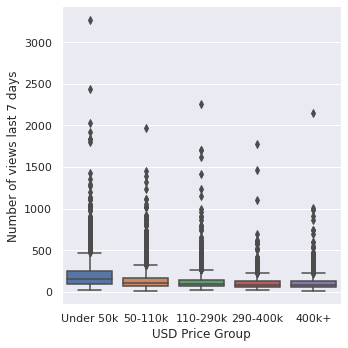

In [271]:
sns.catplot(x='USD Price Group', y='Number of views last 7 days', data=df, kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


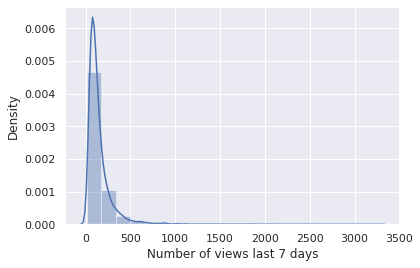

In [272]:
sns.distplot(df['Number of views last 7 days'], bins=20)

In [273]:
# Finish cleaning data then conduct bivariate analysis of each variable vis-a-vis DV of newsletter hits

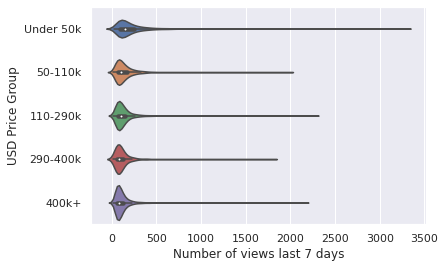

In [274]:
sns.violinplot(y='USD Price Group', x='Number of views last 7 days', data=df, orient='h')

In [275]:
df[['Boat Type - Main','Boat Type - 2nd', 'Boat Type - 3rd']] = df['Boat Type'].str.split(",",expand=True)

In [276]:
df['Manufacturer'].nunique()

910

In [277]:
df.describe()

,Price,Year Built,Length,Width,Number of views last 7 days,USD
count,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000,9.888000e+03
mean,3.201373e+05,1893.192860,11.570017,3.520124,149.160801,3.426720e+05
std,1.007482e+06,460.201582,6.002820,1.220534,151.819752,1.099902e+06
min,3.300000e+03,0.000000,1.040000,0.010000,13.000000,3.637000e+03
25%,4.400000e+04,1996.000000,7.470000,2.540000,70.000000,4.853300e+04
50%,9.500000e+04,2007.000000,10.280000,3.330000,108.000000,1.039590e+05
75%,2.550000e+05,2017.000000,13.930000,4.250000,172.000000,2.802400e+05
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000,3.503000e+07


In [278]:
df2 = df.groupby(['Manufacturer'])['Number of views last 7 days'].median().sort_values(ascending=False).head(21).reset_index()

In [279]:
df2 = pd.DataFrame(df2)
print(df2) 

                                Manufacturer  Number of views last 7 days
0                           Baha power boats                       1831.0
1   Rodriguez Group (Italyachts) power boats                        986.0
2                        Werner  power boats                        900.0
3               Bluewater Yachts power boats                        888.0
4                   The Captains power boats                        888.0
5                         ATOMIX power boats                        885.0
6                    van de Werf power boats                        868.0
7                         Hensa  power boats                        849.0
8                         Pegiva power boats                        790.0
9                        Ockelbo power boats                        781.0
10                         Meier power boats                        746.0
11                         Karel power boats                        700.5
12                        Pavati power

In [280]:
df2.columns =['Manufacturer', 'Median views']
print(df2)

                                Manufacturer  Median views
0                           Baha power boats        1831.0
1   Rodriguez Group (Italyachts) power boats         986.0
2                        Werner  power boats         900.0
3               Bluewater Yachts power boats         888.0
4                   The Captains power boats         888.0
5                         ATOMIX power boats         885.0
6                    van de Werf power boats         868.0
7                         Hensa  power boats         849.0
8                         Pegiva power boats         790.0
9                        Ockelbo power boats         781.0
10                         Meier power boats         746.0
11                         Karel power boats         700.5
12                        Pavati power boats         690.0
13                        Galaxy power boats         654.0
14           VZ Cantiere Nautico power boats         636.0
15                        Malibu power boats         634

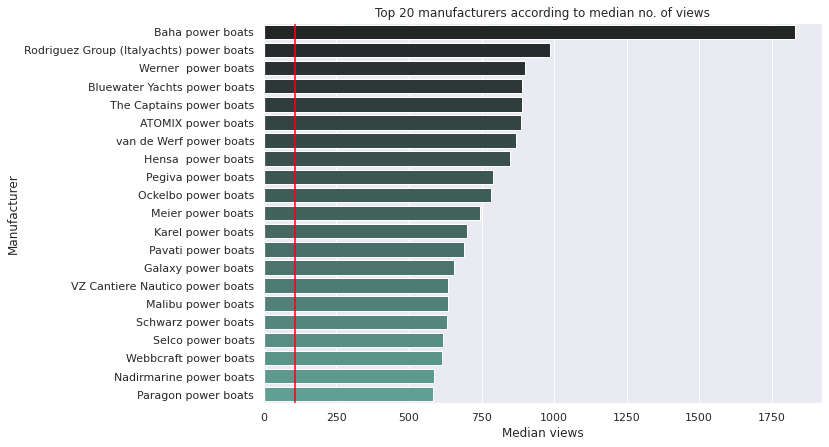

In [281]:
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot(
    x="Median views", 
    y="Manufacturer", 
    data=df2,
    ci=None,
    palette = 'dark:#5A9').set(title='Top 20 manufacturers according to median no. of views')

df['Number of views last 7 days'].median()

plt.axvline(x = 108, color='red')


In [282]:
df['Number of views last 7 days'].median()

108.0

In [283]:
df['Boat Type - Main'].nunique()

26

In [284]:
my_order = df.groupby(by=["Boat Type - Main"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
print(my_order)


Index(['Wakeboard/Wakesurf', 'Water ski', 'Classic', 'Cabin Boat',
       'Fishing Boat', 'Offshore Boat', 'Pontoon Boat', 'Runabout',
       'House Boat', 'Sport Boat', 'Mega Yacht', 'Catamaran', 'Bowrider',
       'Passenger boat', 'Working Boat', 'Launch', 'Motor Yacht', 'Ketch',
       'Trawler', 'Hardtop', 'Pilothouse', 'Flybridge', 'Deck Boat',
       'Center console boat', 'Motorsailer', 'RIB'],
      dtype='object', name='Boat Type - Main')


In [285]:
boat_type_ordered = df.groupby(["Boat Type - Main"])['Number of views last 7 days'].median().sort_values(ascending=False).reset_index()
print(boat_type_ordered)

       Boat Type - Main  Number of views last 7 days
0    Wakeboard/Wakesurf                        300.5
1             Water ski                        218.0
2               Classic                        204.0
3            Cabin Boat                        178.0
4          Fishing Boat                        166.0
5         Offshore Boat                        150.0
6          Pontoon Boat                        144.0
7              Runabout                        142.5
8            House Boat                        139.0
9            Sport Boat                        133.0
10           Mega Yacht                        128.0
11            Catamaran                        125.0
12             Bowrider                        121.0
13       Passenger boat                        117.5
14         Working Boat                        115.5
15               Launch                        105.0
16          Motor Yacht                        102.0
17                Ketch                       

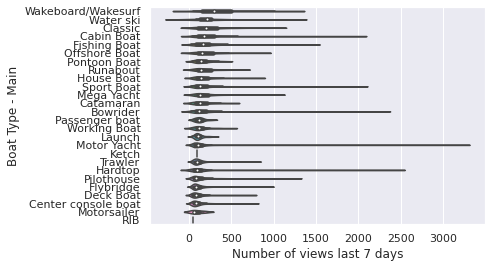

In [286]:
my_order = df.groupby(by=["Boat Type - Main"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index

sns.violinplot(y='Boat Type - Main', x= 'Number of views last 7 days', data=df, order= my_order, orient = 'h')



In [287]:
pv_category = pd.cut(df['Number of views last 7 days'],bins=[0,71,111,176,1301,3263],labels=['Low', 'Medium','More than average', 'Good', 'Best'])
df.insert(16,'PV Group',pv_category)

(0.0, 1050.0)

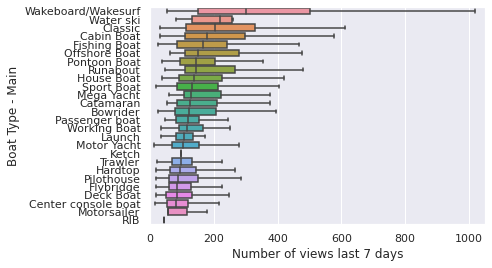

In [288]:
my_order = df.groupby(by=["Boat Type - Main"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
sns.boxplot(y='Boat Type - Main', x= 'Number of views last 7 days', data=df, orient = 'h',showfliers = False, order= my_order)
import matplotlib.pyplot as plt
plt.xlim(0, 1050)

In [289]:
df['Boat Type - Main'].value_counts()

Motor Yacht            2736
Sport Boat             1417
Flybridge              1203
Trawler                 679
Cabin Boat              654
Pilothouse              614
Hardtop                 513
Center console boat     377
Bowrider                310
Deck Boat               285
Classic                 203
Fishing Boat            179
House Boat              148
Mega Yacht              108
Pontoon Boat             91
Runabout                 78
Wakeboard/Wakesurf       60
Offshore Boat            57
Launch                   55
Working Boat             44
Passenger boat           36
Catamaran                26
Water ski                10
Motorsailer               3
Ketch                     1
RIB                       1
Name: Boat Type - Main, dtype: int64

In [290]:
df.head(5)

,Price,USD Price Group,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,USD,Boat Type - Main,Boat Type - 2nd,Boat Type - 3rd,PV Group
0,3337,Under 50k,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3637,Motor Yacht,None,None,Good
1,3490,Under 50k,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3943,Center console boat,None,None,Medium
2,3770,Under 50k,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,4109,Sport Boat,None,None,More than average
3,25900,Under 50k,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3885,Sport Boat,None,None,Low
4,3399,Under 50k,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3840,Fishing Boat,None,None,Low


In [291]:
df['PV Group'].value_counts(ascending=False)

Medium               2618
Low                  2586
Good                 2342
More than average    2321
Best                   21
Name: PV Group, dtype: int64

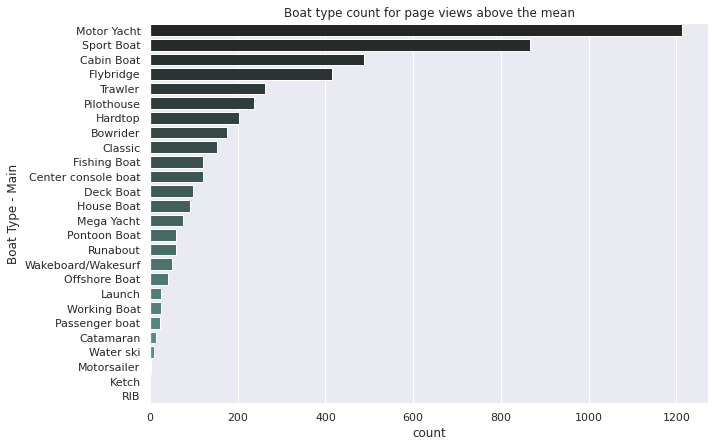

In [292]:
df_filtered = df.groupby(['Boat Type - Main']).apply(lambda x: (x['Number of views last 7 days'] >= 110).sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Boat Type - Main", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Boat type count for page views above the mean');


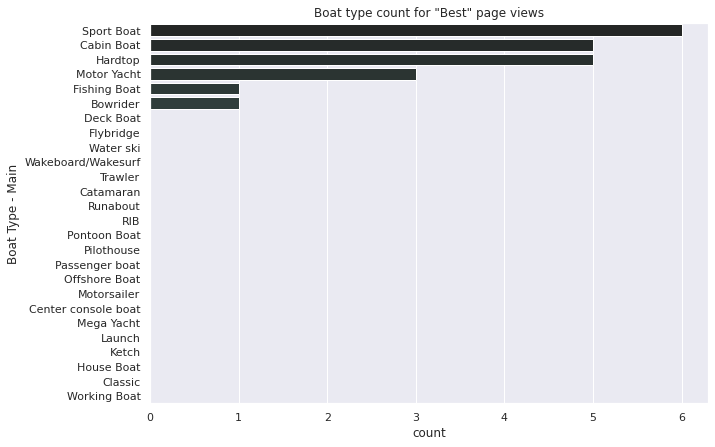

In [293]:
df_filtered = df.groupby(['Boat Type - Main']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Boat Type - Main", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Boat type count for "Best" page views');

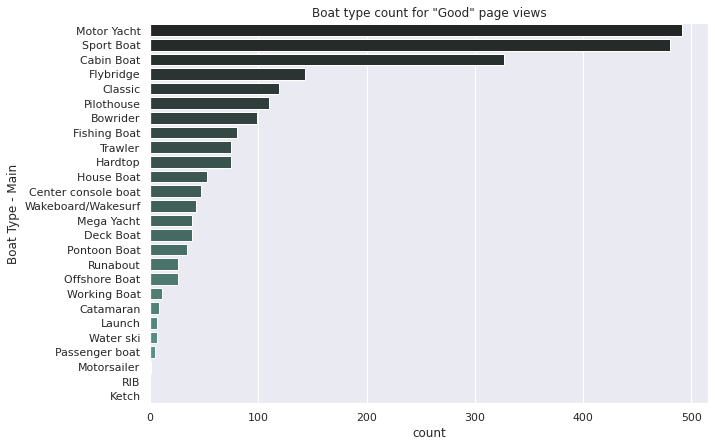

In [294]:
df_filtered = df.groupby(['Boat Type - Main']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Boat Type - Main", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Boat type count for "Good" page views');

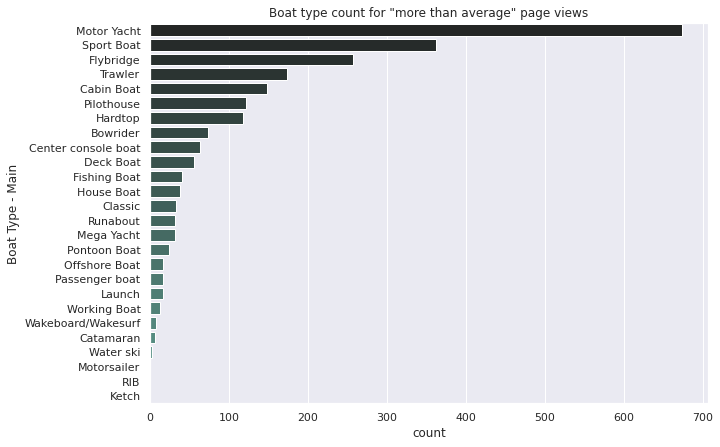

In [295]:
df_filtered = df.groupby(['Boat Type - Main']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Boat Type - Main", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Boat type count for "more than average" page views');

In [296]:

df['Age'] = 2022 - df['Year Built']
df['Age'] = df['Age'].replace(2022, 0) # Replace 2022 with 0

In [297]:
print(df['Age'])

0        5
1        2
2        0
3        2
4        3
        ..
9883    35
9884     0
9885     2
9886     4
9887     3
Name: Age, Length: 9888, dtype: int64


In [298]:
df['Age'].unique()

array([  5,   2,   0,   3,  23,   4,  35,  18,  25,  37,  41,  11,  43,
        24,  28,  26,  50,  42,  48,  39,  31,  30,  61,   7,  22,  29,
        54,  15,  32,  12,  47,  36,  81,  51,  17,  27,  46,  21,  16,
         6,  38,  58,  44,  82,  34,  19,  45,  49,  52, 109,  57,  72,
         8,  20,  59,  14,  74,  62,  92,  13,  33,  53,  40,  85,   9,
        10,  68,  63, 113,  96, 112,  60,  84,  86,  55, 119,  89, 116,
       114,   1,  95,  93,  66,  64, 100,  70,  65,  94, 117,  71, 111,
        56, 107,  88,  83,  69,  98,  91, 102, 124,  67, 115, 137, 127,
       108, 121,  80, 103,  97, 133,  76, 118,  99, 105,  87,  73,  75,
       110,  77, 125, 120, 122])

In [299]:
df.describe()

,Price,Year Built,Length,Width,Number of views last 7 days,USD,Age
count,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000,9.888000e+03,9888.000000
mean,3.201373e+05,1893.192860,11.570017,3.520124,149.160801,3.426720e+05,16.132989
std,1.007482e+06,460.201582,6.002820,1.220534,151.819752,1.099902e+06,16.370045
min,3.300000e+03,0.000000,1.040000,0.010000,13.000000,3.637000e+03,0.000000
25%,4.400000e+04,1996.000000,7.470000,2.540000,70.000000,4.853300e+04,3.000000
50%,9.500000e+04,2007.000000,10.280000,3.330000,108.000000,1.039590e+05,14.000000
75%,2.550000e+05,2017.000000,13.930000,4.250000,172.000000,2.802400e+05,22.000000
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000,3.503000e+07,137.000000


Text(0.5, 1.0, 'bins = 15')

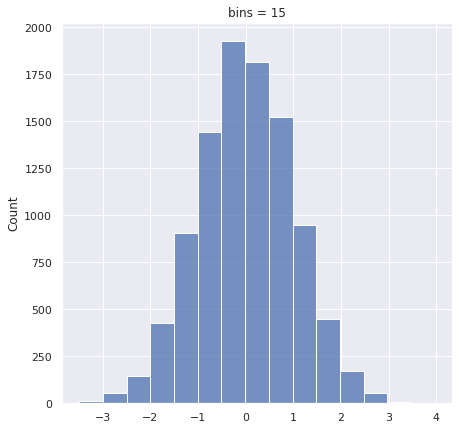

In [300]:
np.random.seed(11)
norm_dist = np.random.randn(9888)
bin_count = int(np.ceil(np.log2(len(norm_dist))) + 1)
fig = plt.figure(figsize=(7,7))
sns.histplot(x=norm_dist,bins=bin_count)
plt.title(f'bins = {bin_count}')



In [301]:
age_category = pd.cut(df.Age,bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],labels=['0-10 years',
                                                                                             '10-20 years',
                                                                                             '20-30 years',
                                                                                             '30-40 years',
                                                                                             '40-50 years',
                                                                                             '50-60 years',
                                                                                             '60-70 years',
                                                                                             '70-80 years',
                                                                                             '80-90 years',
                                                                                             '90-100 years',
                                                                                             '100-110 years',
                                                                                             '110-120 years',
                                                                                             '120-130 years',
                                                                                             '130-140 years'])
df.insert(18,'Age Group',age_category)

In [302]:
df['Age Group'].value_counts()

0-10 years       3589
10-20 years      2970
20-30 years      1417
30-40 years       666
40-50 years       380
50-60 years       123
60-70 years        52
90-100 years       41
110-120 years      34
80-90 years        21
70-80 years        20
100-110 years      15
120-130 years       7
130-140 years       2
Name: Age Group, dtype: int64

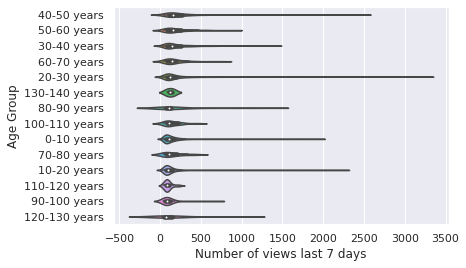

In [303]:
my_order = df.groupby(by=["Age Group"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index

sns.violinplot(y='Age Group', x= 'Number of views last 7 days', data=df, order= my_order, orient = 'h')



(0.0, 550.0)

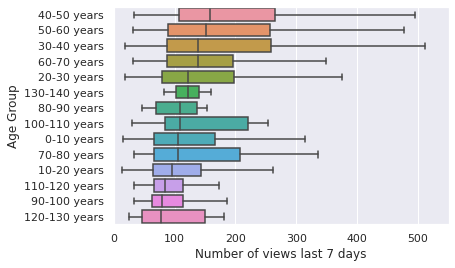

In [304]:
my_order = df.groupby(by=["Age Group"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
sns.boxplot(y='Age Group', x= 'Number of views last 7 days', data=df, orient = 'h',showfliers = False, order = my_order)
import matplotlib.pyplot as plt
plt.xlim(0, 550)

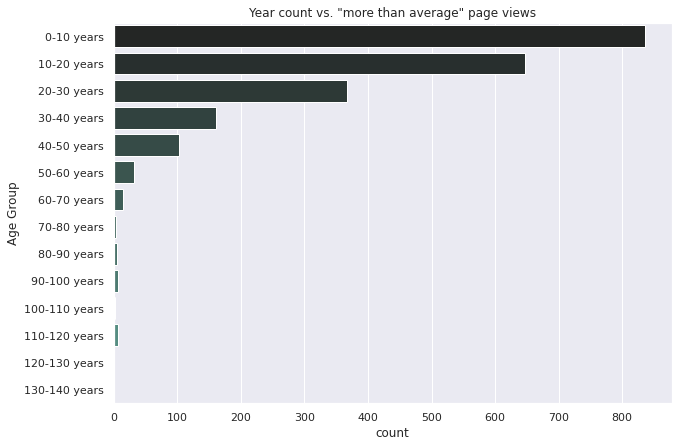

In [305]:
df_filtered = df.groupby(['Age Group']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Age Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Year count vs. "more than average" page views');

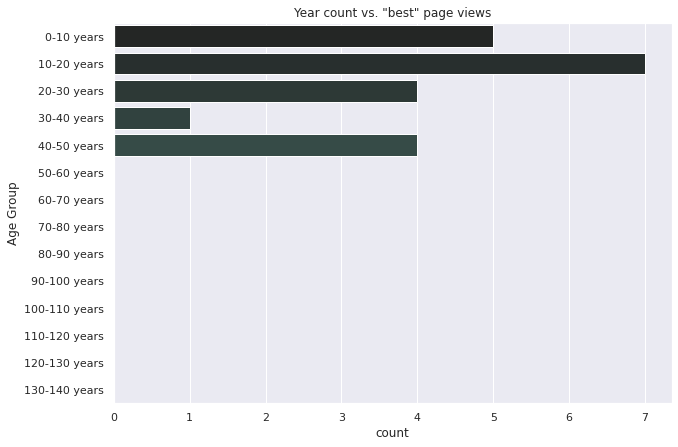

In [306]:
df_filtered = df.groupby(['Age Group']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Age Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Year count vs. "best" page views');

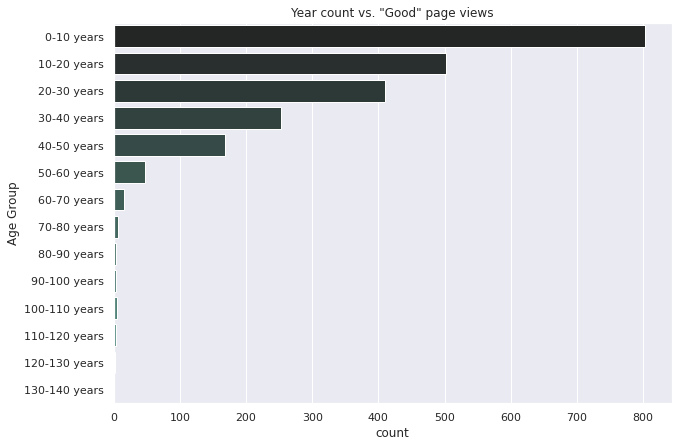

In [307]:
df_filtered = df.groupby(['Age Group']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Age Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Year count vs. "Good" page views');

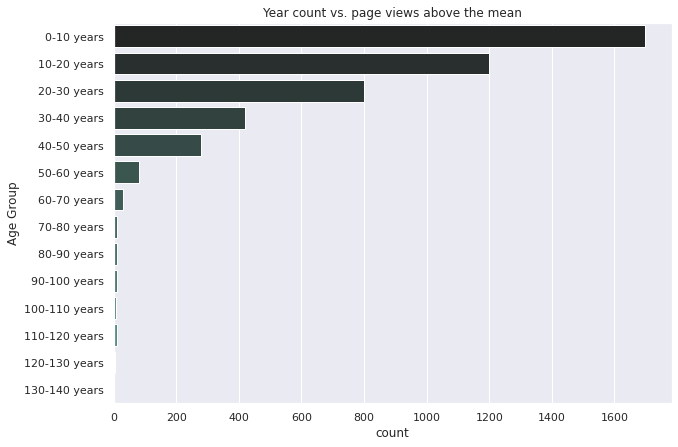

In [308]:
df_filtered = df.groupby(['Age Group']).apply(lambda x: (x['Number of views last 7 days'] >= 110).sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Age Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Year count vs. page views above the mean');

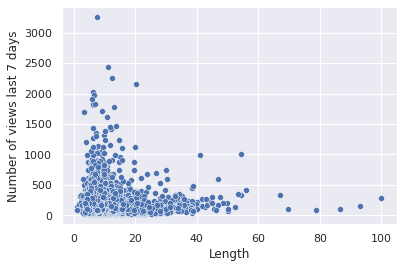

In [309]:
sns.scatterplot(data=df, x="Length", y="Number of views last 7 days")

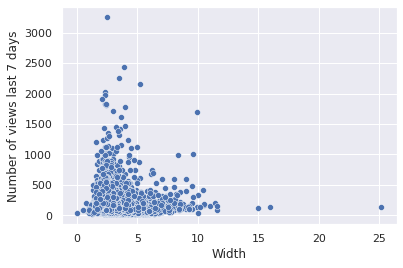

In [310]:
sns.scatterplot(data=df, x="Width", y="Number of views last 7 days")

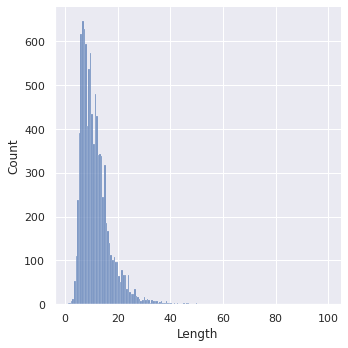

In [311]:
sns.displot(df, x="Length")

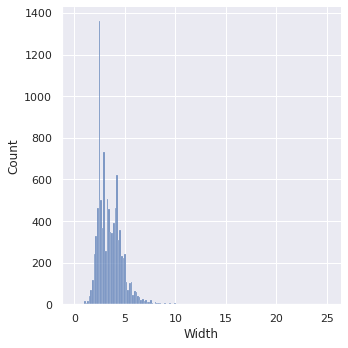

In [312]:
sns.displot(df, x="Width")

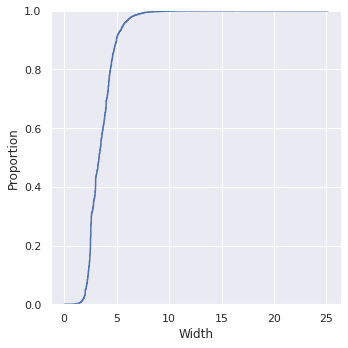

In [313]:
sns.displot(df, x="Width", kind="ecdf")

In [314]:
df[['Country', 'Region', 'Sub Region']] = df['Location'].str.split('» ',expand=True)
df['Country'] = df['Country'].str.replace(' Â', '')
df['Region'] = df['Region'].str.replace(' Â', '')

In [315]:
list(df)

['Price',
 'USD Price Group',
 'Boat Type',
 'Manufacturer',
 'Type',
 'Year Built',
 'Length',
 'Width',
 'Material',
 'Location',
 'Number of views last 7 days',
 'Currency',
 'USD',
 'Boat Type - Main',
 'Boat Type - 2nd',
 'Boat Type - 3rd',
 'PV Group',
 'Age',
 'Age Group',
 'Country',
 'Region',
 'Sub Region']

In [316]:
top_10_country = df['Country'].value_counts(ascending = False).head(11).reset_index()
print(top_10_country)

                 index  Country
0              Germany     1914
1                Italy     1793
2               France     1229
3          Switzerland     1112
4          Netherlands     1056
5   Croatia (Hrvatska)      810
6                Spain      702
7       United Kingdom      215
8              Denmark      172
9             Portugal      135
10             Austria       88


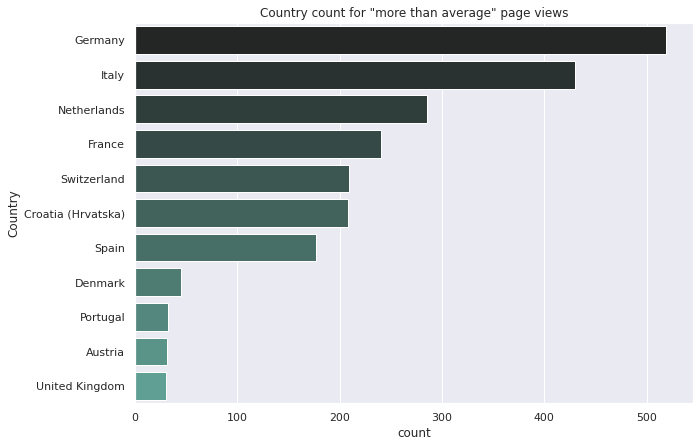

In [317]:
df_filtered = df.groupby(['Country']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False).head(11)

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Country", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Country count for "more than average" page views');

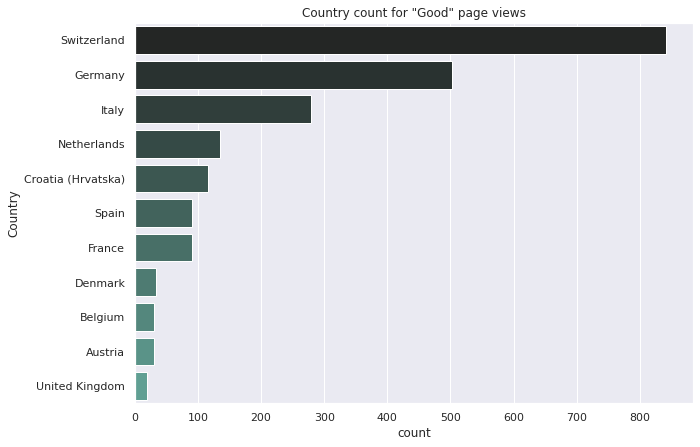

In [318]:
df_filtered = df.groupby(['Country']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False).head(11)

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Country", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Country count for "Good" page views');

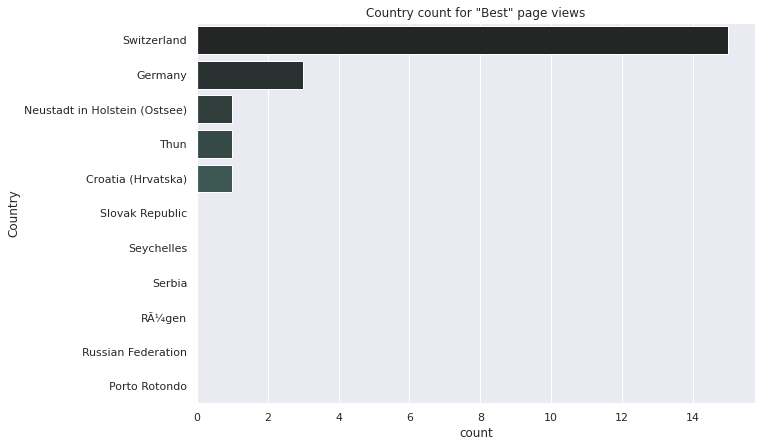

In [319]:
df_filtered = df.groupby(['Country']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False).head(11)

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Country", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Country count for "Best" page views');

In [320]:
df['Material'].unique()

array([nan, 'Thermoplastic', 'Aluminium', 'GRP', 'PVC', 'Plastic', 'Wood',
       'Steel', 'Hypalon', 'Carbon Fiber', 'Reinforced concrete',
       'Rubber'], dtype=object)

(0.0, 1250.0)

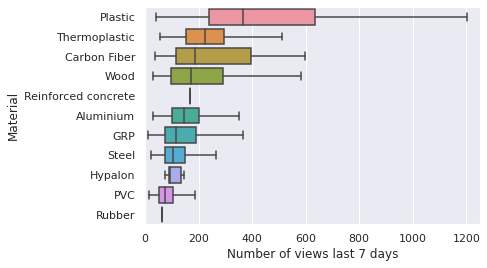

In [321]:
my_order = df.groupby(by=["Material"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
sns.boxplot(y='Material', x= 'Number of views last 7 days', data=df, orient = 'h',showfliers = False, order = my_order)
import matplotlib.pyplot as plt
plt.xlim(0, 1250)

In [322]:
df['Material'].value_counts()

GRP                    5484
PVC                    1123
Steel                   939
Wood                    235
Aluminium               229
Plastic                  77
Carbon Fiber             30
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: Material, dtype: int64

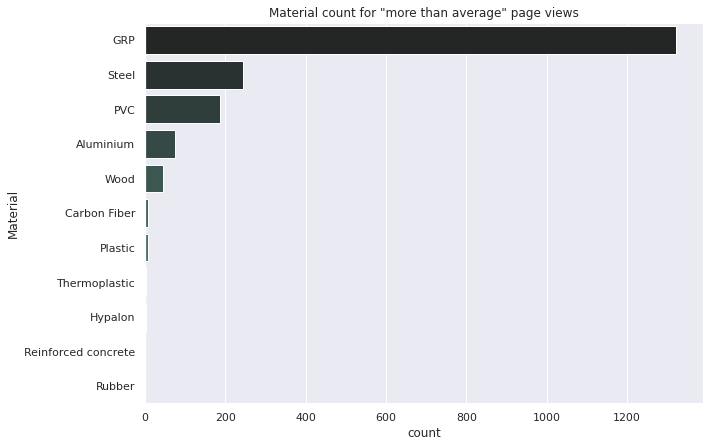

In [323]:
df_filtered = df.groupby(['Material']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Material", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Material count for "more than average" page views');

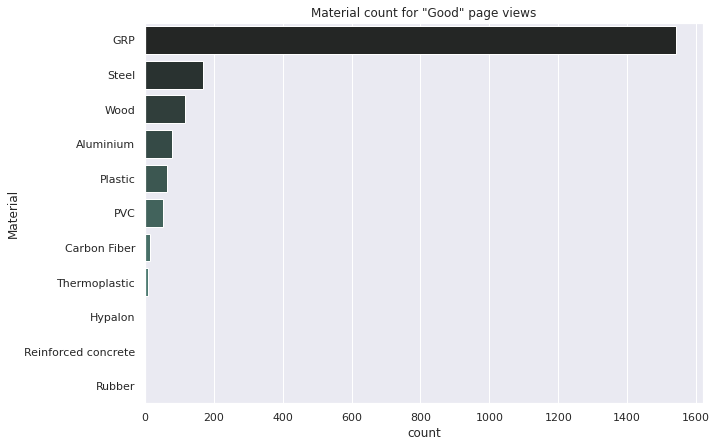

In [324]:
df_filtered = df.groupby(['Material']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Material", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Material count for "Good" page views');

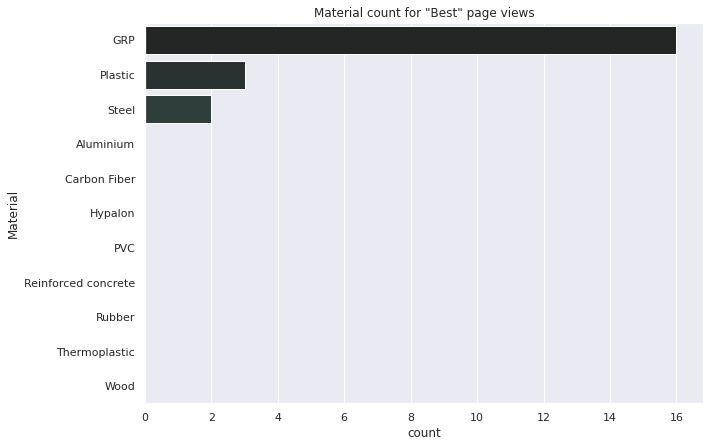

In [325]:
df_filtered = df.groupby(['Material']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Material", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Material count for "Best" page views');

In [326]:
df["Width"].max()

25.16

In [327]:
pv_category = pd.cut(df['Width'],bins=[0,2,4,6,8,10,12],labels=['0-2m',
                                                                                     '2-4m',
                                                                                     '4-6m',
                                                                                     '6-8m',
                                                                                     '8-10m',
                                                                                     '10-12m', 
                                                                                    ])
df.insert(22,'Width range',pv_category)

In [328]:
list(df)

['Price',
 'USD Price Group',
 'Boat Type',
 'Manufacturer',
 'Type',
 'Year Built',
 'Length',
 'Width',
 'Material',
 'Location',
 'Number of views last 7 days',
 'Currency',
 'USD',
 'Boat Type - Main',
 'Boat Type - 2nd',
 'Boat Type - 3rd',
 'PV Group',
 'Age',
 'Age Group',
 'Country',
 'Region',
 'Sub Region',
 'Width range']

(0.0, 600.0)

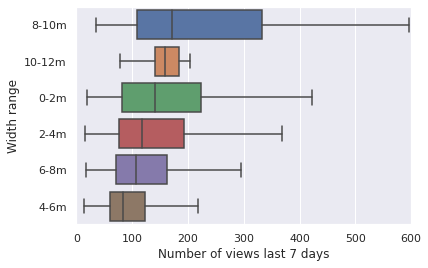

In [329]:
my_order = df.groupby(by=["Width range"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
sns.boxplot(y='Width range', x= 'Number of views last 7 days', data=df, orient = 'h',showfliers = False, order = my_order)
import matplotlib.pyplot as plt
plt.xlim(0, 600)

In [330]:
df['Width range'].value_counts()

2-4m      6335
4-6m      2703
0-2m       468
6-8m       281
8-10m       34
10-12m       8
Name: Width range, dtype: int64

In [331]:
df['Width range'].value_counts()

2-4m      6335
4-6m      2703
0-2m       468
6-8m       281
8-10m       34
10-12m       8
Name: Width range, dtype: int64

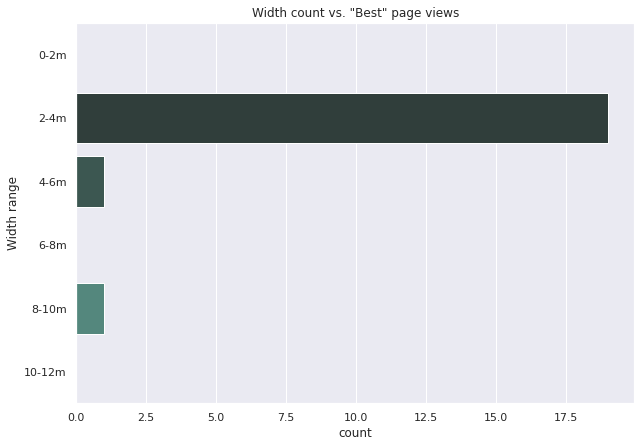

In [332]:
df_filtered = df.groupby(['Width range']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Width range", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Width count vs. "Best" page views');

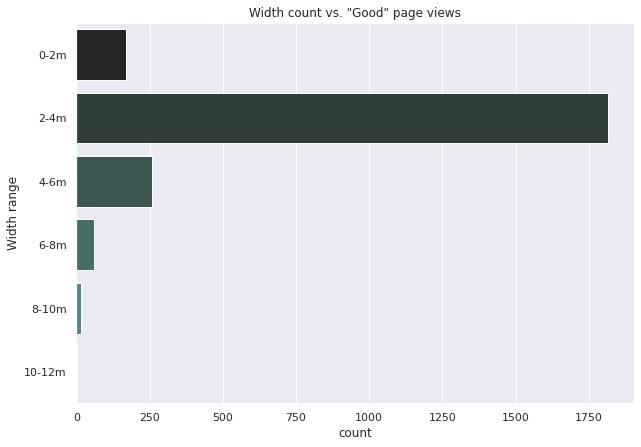

In [333]:
df_filtered = df.groupby(['Width range']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Width range", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Width count vs. "Good" page views');

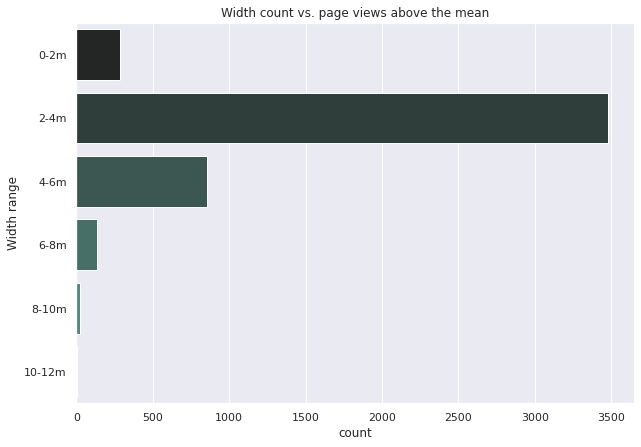

In [334]:
df_filtered = df.groupby(['Width range']).apply(lambda x: (x['Number of views last 7 days'] >= 110).sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Width range", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Width count vs. page views above the mean');

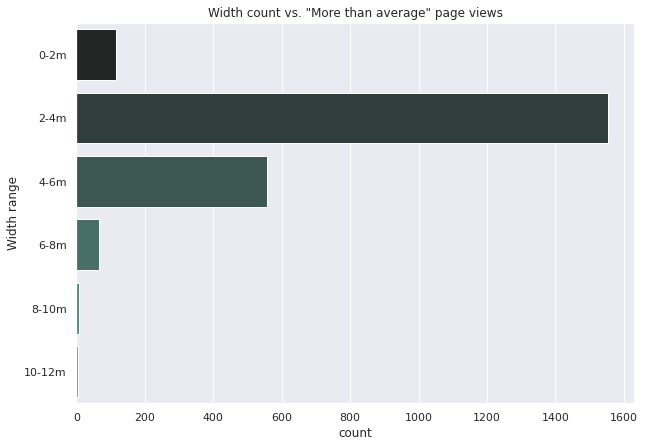

In [335]:
df_filtered = df.groupby(['Width range']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Width range", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Width count vs. "More than average" page views');

In [336]:
df["Length"].min()

1.04

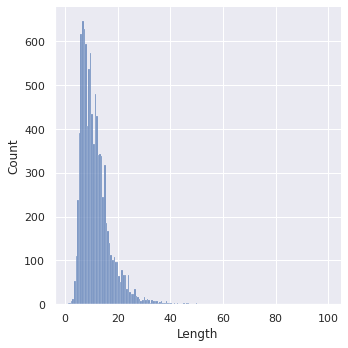

In [337]:
sns.displot(df, x="Length")

In [338]:
df.describe()

,Price,Year Built,Length,Width,Number of views last 7 days,USD,Age
count,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000,9.888000e+03,9888.000000
mean,3.201373e+05,1893.192860,11.570017,3.520124,149.160801,3.426720e+05,16.132989
std,1.007482e+06,460.201582,6.002820,1.220534,151.819752,1.099902e+06,16.370045
min,3.300000e+03,0.000000,1.040000,0.010000,13.000000,3.637000e+03,0.000000
25%,4.400000e+04,1996.000000,7.470000,2.540000,70.000000,4.853300e+04,3.000000
50%,9.500000e+04,2007.000000,10.280000,3.330000,108.000000,1.039590e+05,14.000000
75%,2.550000e+05,2017.000000,13.930000,4.250000,172.000000,2.802400e+05,22.000000
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000,3.503000e+07,137.000000


In [339]:
print(df.quantile([0.25,0.5,0.75,0.98]))

          Price  Year Built  Length   Width  Number of views last 7 days  \
0.25    44000.0      1996.0    7.47  2.5400                        70.00   
0.50    95000.0      2007.0   10.28  3.3300                       108.00   
0.75   255000.0      2017.0   13.93  4.2500                       172.00   
0.98  2388520.0      2020.0   27.07  6.4938                       583.52   

            USD   Age  
0.25    48533.0   3.0  
0.50   103959.0  14.0  
0.75   280240.0  22.0  
0.98  2429500.0  60.0  


In [340]:
pv_category = pd.cut(df['Length'],bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],labels=['0-2m',
                                                                '2-4m',
                                                                '4-6m',
                                                                '6-8m',
                                                                '8-10m',
                                                                '10-12m',
                                                                '12-14m',
                                                                '14-16m',
                                                                '16-18m',
                                                                '18-20m',
                                                                '20-22m',
                                                                '22-24m',
                                                                '24-26m',
                                                                '26-28m',
                                                                '28-30m'])
df.insert(23,'Length range',pv_category)

(0.0, 450.0)

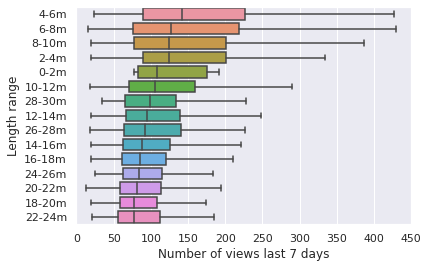

In [341]:
my_order = df.groupby(by=["Length range"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
sns.boxplot(y='Length range', x= 'Number of views last 7 days', data=df, orient = 'h',showfliers = False, order = my_order)
import matplotlib.pyplot as plt
plt.xlim(0, 450)

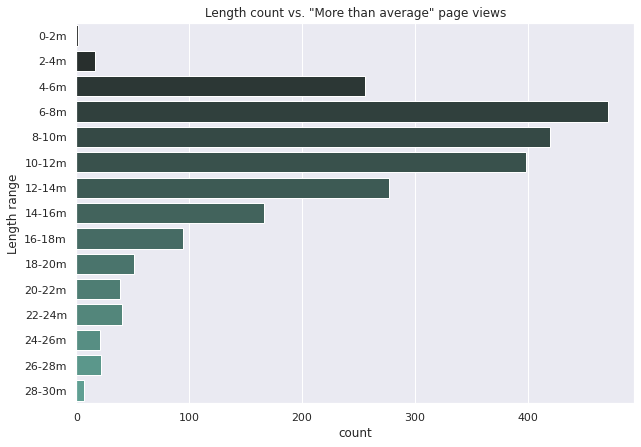

In [342]:
df_filtered = df.groupby(['Length range']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Length range", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Length count vs. "More than average" page views');

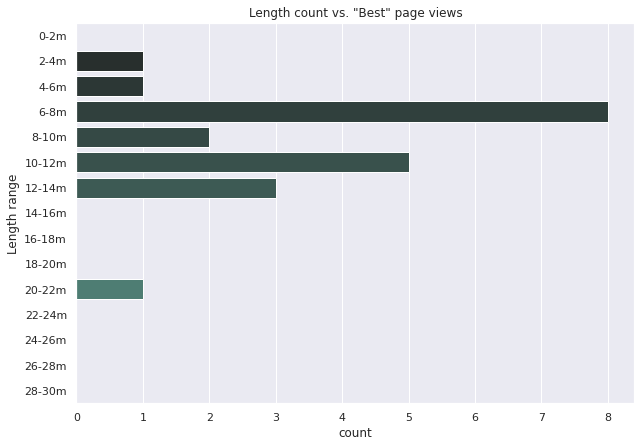

In [343]:
df_filtered = df.groupby(['Length range']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Length range", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Length count vs. "Best" page views');

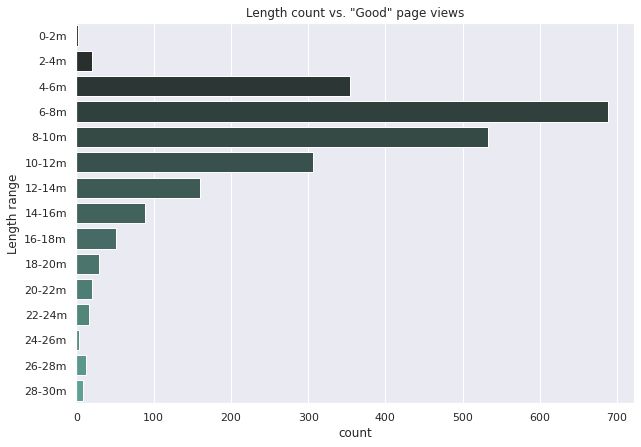

In [344]:
df_filtered = df.groupby(['Length range']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Length range", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Length count vs. "Good" page views');

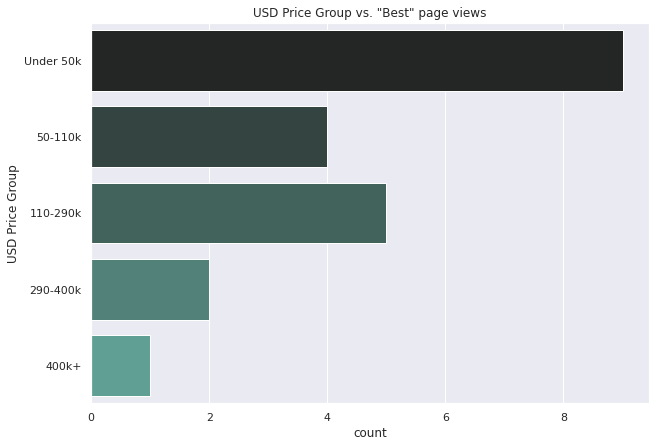

In [345]:
df_filtered = df.groupby(['USD Price Group']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="USD Price Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='USD Price Group vs. "Best" page views');

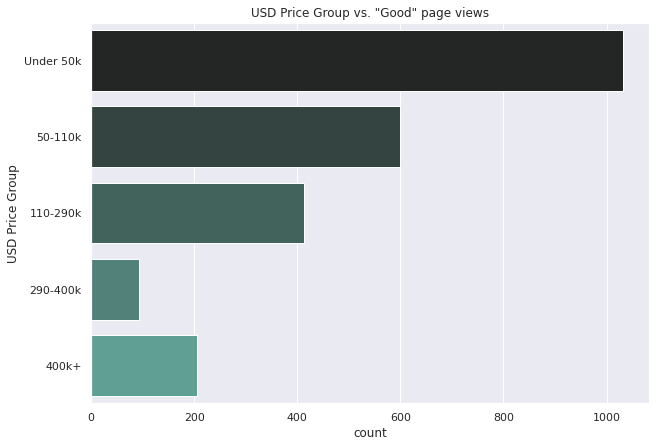

In [346]:
df_filtered = df.groupby(['USD Price Group']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="USD Price Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='USD Price Group vs. "Good" page views');

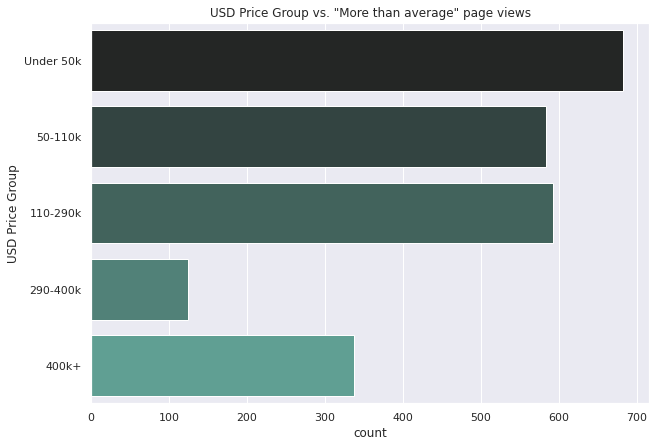

In [347]:
df_filtered = df.groupby(['USD Price Group']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="USD Price Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='USD Price Group vs. "More than average" page views');

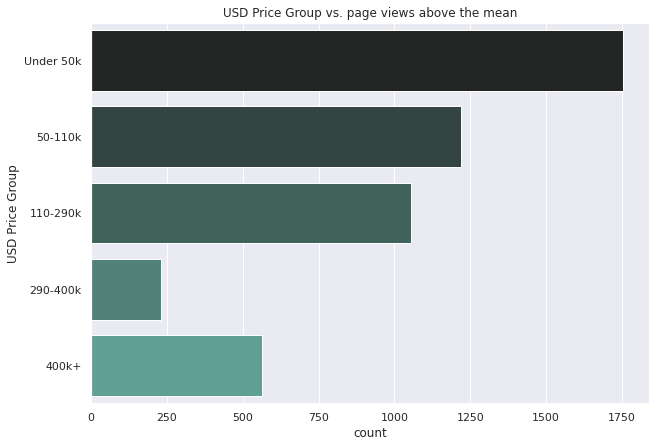

In [348]:
df_filtered = df.groupby(['USD Price Group']).apply(lambda x: (x['Number of views last 7 days'] >= 110).sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="USD Price Group", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='USD Price Group vs. page views above the mean');

In [349]:
df[['Condition', 'Fuel']] = df['Type'].str.split(",",expand=True)

In [350]:
df['Condition'].unique()

array(['new boat from stock', 'Used boat', 'new boat on order',
       'Unleaded', 'Diesel', 'Display Model', nan, 'Electric'],
      dtype=object)

In [351]:
accepted_strings = ['new boat from stock', 'Used boat', 'new boat on order', 'Display Model']

In [352]:
df2 = df[df.Condition.isin(accepted_strings)]
print(df2)

      Price USD Price Group            Boat Type           Manufacturer  \
0      3337       Under 50k          Motor Yacht   Rigiflex power boats   
1      3490       Under 50k  Center console boat      Terhi power boats   
2      3770       Under 50k           Sport Boat     Marine power boats   
3     25900       Under 50k           Sport Boat     Pioner power boats   
4      3399       Under 50k         Fishing Boat     Linder power boats   
...     ...             ...                  ...                    ...   
9883   4900       Under 50k           Sport Boat    Sea Ray power boats   
9884   4516       Under 50k           Sport Boat                    NaN   
9885   4499       Under 50k           Sport Boat  BlueCraft power boats   
9886   4300       Under 50k         Pontoon Boat      Whaly power boats   
9887   3780       Under 50k         Fishing Boat    DarekCo power boats   

                              Type  Year Built  Length  Width       Material  \
0              new 

(0.0, 375.0)

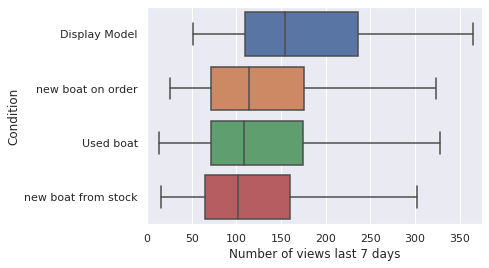

In [353]:
my_order = df2.groupby(by=["Condition"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
sns.boxplot(y='Condition', x= 'Number of views last 7 days', data=df2, orient = 'h',showfliers = False, order = my_order)
import matplotlib.pyplot as plt
plt.xlim(0, 375)

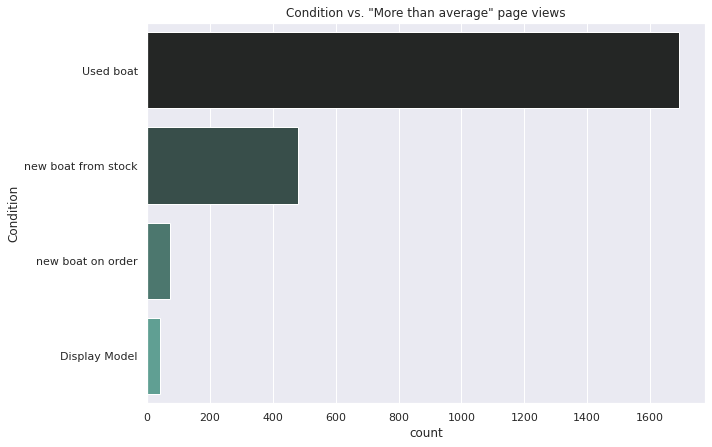

In [354]:
df_filtered = df2.groupby(['Condition']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Condition", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Condition vs. "More than average" page views');

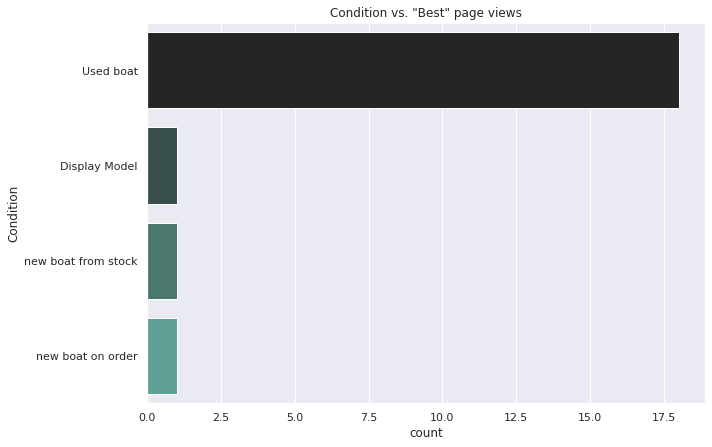

In [355]:
df_filtered = df2.groupby(['Condition']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Condition", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Condition vs. "Best" page views');

In [356]:
df['Fuel'].unique()

array([None, 'Unleaded', 'Electric', 'Diesel', 'Gas', nan, 'Hybrid',
       'Propane'], dtype=object)

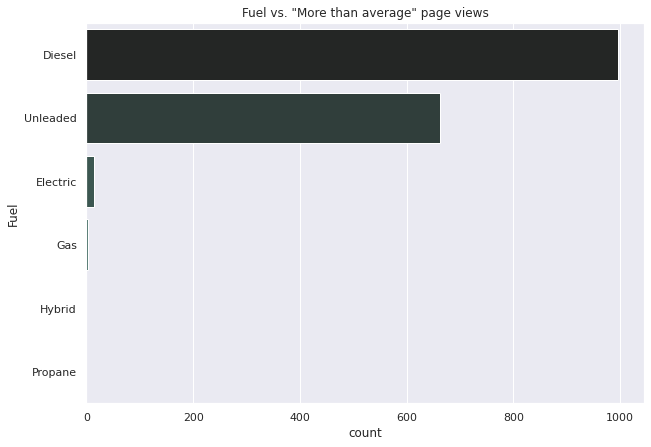

In [357]:
df_filtered = df.groupby(['Fuel']).apply(lambda x: (x['PV Group'] == 'More than average').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Fuel", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Fuel vs. "More than average" page views');

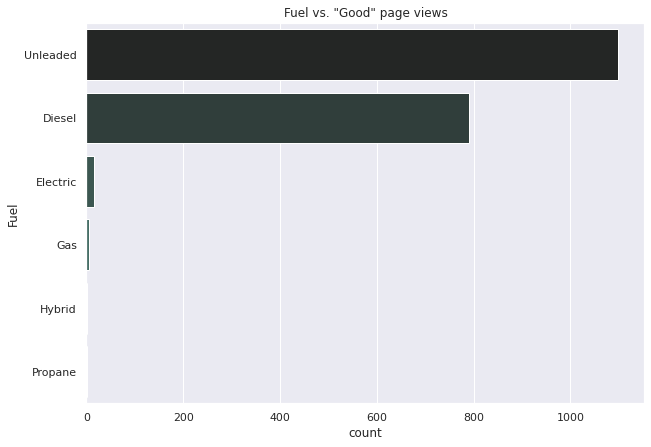

In [358]:
df_filtered = df.groupby(['Fuel']).apply(lambda x: (x['PV Group'] == 'Good').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Fuel", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Fuel vs. "Good" page views');

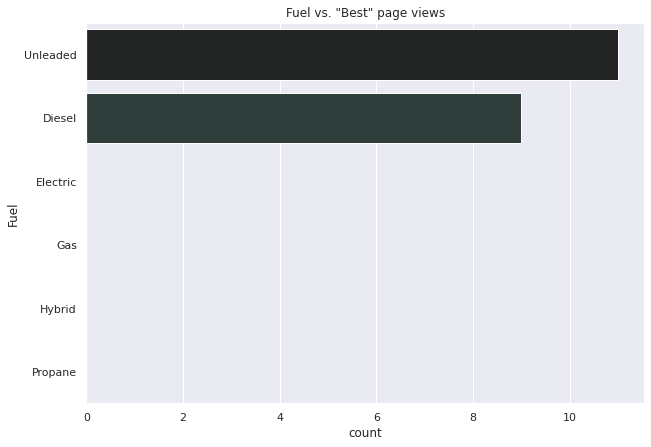

In [359]:
df_filtered = df.groupby(['Fuel']).apply(lambda x: (x['PV Group'] == 'Best').sum()).reset_index(name='count')
df_filtered = df_filtered.sort_values('count', ascending = False)


# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="count", 
    y="Fuel", 
    data=df_filtered,  
    ci=None, 
    palette = 'dark:#5A9').set(title='Fuel vs. "Best" page views');

(0.0, 500.0)

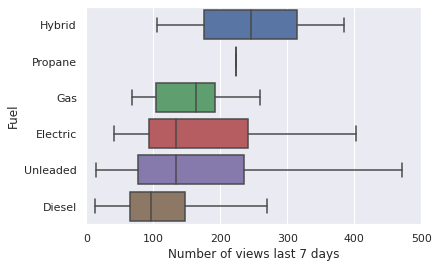

In [360]:
my_order = df.groupby(by=["Fuel"])["Number of views last 7 days"].median().sort_values(ascending=False).iloc[::+1].index
sns.boxplot(y='Fuel', x= 'Number of views last 7 days', data=df, orient = 'h',showfliers = False, order = my_order)
import matplotlib.pyplot as plt
plt.xlim(0, 500)

In [361]:
df['Fuel'].value_counts()

Diesel      4511
Unleaded    3018
Electric      51
Gas           13
Hybrid         2
Propane        1
Name: Fuel, dtype: int64